 # Final Project

## Product Range Analysis

### Description

The given data consists of information on the different products of the store consisting of information about the Invoice number(order identifier), Stockcode(item identifier), item name, order date, per unit item price. The decomposition of the product range analysis focuses on understanding the relationship between different parametrs like price, date and quantity on the purchase of products. 
1)Formulating hypothesis to understand which products are high in demand and which are less sold or need to be discarded in the near future. 
2)Understanding the relationships between selling of multiple products based on purchase time and volume.

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

import numpy as np
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from pymystem3 import Mystem
m = Mystem()
from collections import Counter
import plotly.graph_objects as go
import numpy as np
import plotly.figure_factory as ff
from scipy import stats as st

### Opening the dataset

In [2]:
df = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')

# Study general information
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  
2  11/29/2018 08:26       2.75     17850.0  
3  11/29/2018 08:26       3.39     17850.0  
4  11/29/2018 08:26       3.39     17850.0

To find weather a product is in high demand or not I would first take arrange the products based on the quantity sold and the date of selling based on these features the correlation matrix can be found on how the other parameters like unit price and customer id details relate with these features, after looking at these features we can quantify as products in high demand, products not in demand or can be discontinued. Another feature to categorize the product can be based on lemmatization using nltk for understanding which type of product categories based on description of product as kitchen accessories, household, security etc. are more in demand as per the quantity sold. The hypothesis I would focus on involves does the price range of the product impact on its demand or not, another hypothesis could be does a category of a product has an impact in its demand or not, does the date impact the popularity of particular kind of products.

In [3]:
display(df.describe())

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

It is observed there are some erroneus values in the quantity and unit price column as we can see negative values and the maximum for quanitity is 80995

In [4]:
display(df['Quantity'].describe()) 
print(' ')
display(df['UnitPrice'].describe())

df.hist('UnitPrice',bins=20, range = (0, 10))

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bb083a2d0>]],
      dtype=object)

the above graph provides a rough estimate that most of the items have the unit price between 0-2

In [5]:
display(df.query('Quantity > 100'))

InvoiceNo StockCode                        Description  Quantity  \
96        536378     21212    PACK OF 72 RETROSPOT CAKE CASES       120   
178       536387     79321                      CHILLI LIGHTS       192   
179       536387     22780     LIGHT GARLAND BUTTERFILES PINK       192   
180       536387     22779         WOODEN OWLS LIGHT GARLAND        192   
181       536387     22466      FAIRY TALE COTTAGE NIGHTLIGHT       432   
...          ...       ...                                ...       ...   
540442    581487     21137           BLACK RECORD COVER FRAME       120   
541286    581497     22355          CHARLOTTE BAG SUKI DESIGN       110   
541545    581501     22319  HAIRCLIPS FORTIES FABRIC ASSORTED       180   
541702    581566     23404         HOME SWEET HOME BLACKBOARD       144   
541711    581567     21326   AGED GLASS SILVER T-LIGHT HOLDER       144   

             InvoiceDate  UnitPrice  CustomerID  
96      11/29/2018 09:37       0.42     14688.0  
178     11/29/2018 09:58       3.82     16029.0  
179     11/29/2018 09:58       3.37     16029.0  
180     11/29/2018 09:58       3.37     16029.0  
181     11/29/2018 09:58       1.45     16029.0  
...                  ...        ...         ...  
540442  12/07/2019 09:44       3.39     15694.0  
541286  12/07/2019 10:23       2.46         NaN  
541545  12/07/2019 10:46       0.19     12985.0  
541702  12/07/2019 11:50       3.26     18102.0  
541711  12/07/2019 11:56       0.55     16626.0  

[4950 rows x 7 columns]

Here I filtered for products with more than 100 quantity to understand which products are popular in the market segmentation, of all the products we get a resultant list of 4950 rows

In [6]:
df['InvoiceNo'].duplicated().sum()

516009

In [7]:
df['StockCode'].duplicated().sum()

537839

In [8]:
df['CustomerID'].duplicated().sum()

537536

In the above step I have realized that there are duplicate values in 'InvoiceNo', 'stock_code' and 'CustomerId' columns

In [9]:
unique_users = df.groupby('InvoiceNo').agg({'CustomerID': 'nunique'})
unique_users.head()

CustomerID
InvoiceNo            
536365              1
536366              1
536367              1
536368              1
536369              1

In [10]:
report = unique_users.query('CustomerID > 1').sort_values(by='CustomerID', ascending=False)
display(report)

Empty DataFrame
Columns: [CustomerID]
Index: []

I was checking for the number of unique users and I can conclude that all the unique users have a single customer id correlated and the above blank result justifies this conclusion

In [11]:
df['CustomerID'].isna().sum()

135080

In [12]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

there are null values in the description and customerID column

In [13]:
# Changing column names format
df.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id']

# Changing entries into lowercase
df['description'] = df['description'].str.lower()

# Showing the first five rows
df.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   white hanging heart t-light holder         6   
1     536365      71053                  white metal lantern         6   
2     536365     84406B       cream cupid hearts coat hanger         8   
3     536365     84029G  knitted union flag hot water bottle         6   
4     536365     84029E       red woolly hottie white heart.         6   

       invoice_date  unit_price  customer_id  
0  11/29/2018 08:26        2.55      17850.0  
1  11/29/2018 08:26        3.39      17850.0  
2  11/29/2018 08:26        2.75      17850.0  
3  11/29/2018 08:26        3.39      17850.0  
4  11/29/2018 08:26        3.39      17850.0

In [14]:
# Converting data types
df['invoice_no'] = df['invoice_no'].astype('category')
df['stock_code'] = df['stock_code'].astype('category')
df['quantity'] = df['quantity'].astype('int32')
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%m/%d/%Y %H:%M')
df['unit_price'] = df['unit_price'].astype('float32')
df['customer_id'] = df['customer_id'].astype('float16')

Converting the data types for ease of processing our data and to save the memory space I have converted the data types into neccessary types

In [15]:
# Displaying the dataframe info
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
invoice_no      541909 non-null category
stock_code      541909 non-null category
description     540455 non-null object
quantity        541909 non-null int32
invoice_date    541909 non-null datetime64[ns]
unit_price      541909 non-null float32
customer_id     406829 non-null float16
dtypes: category(2), datetime64[ns](1), float16(1), float32(1), int32(1), object(1)
memory usage: 57.7 MB


there are different negative values which must be understood in the quantity and unit_price column

In [16]:
# Showing the missing values in the `description` column
df[df.description.isna()].head()

invoice_no stock_code description  quantity        invoice_date  \
622      536414      22139         NaN        56 2018-11-29 11:52:00   
1970     536545      21134         NaN         1 2018-11-29 14:32:00   
1971     536546      22145         NaN         1 2018-11-29 14:33:00   
1972     536547      37509         NaN         1 2018-11-29 14:33:00   
1987     536549     85226A         NaN         1 2018-11-29 14:34:00   

      unit_price  customer_id  
622          0.0          NaN  
1970         0.0          NaN  
1971         0.0          NaN  
1972         0.0          NaN  
1987         0.0          NaN

In [17]:
df.query('stock_code == "22139"').description.value_counts()

retrospot tea set ceramic 11 pc     988
amazon                                1
Name: description, dtype: int64

In the above steps I tried to query the stock_code value for first NaN value to check the description of other products with similar stock_code and I have decided to take the mode of these values to fill in the missing decription values as suggested by the data as the most suitable values.

In [18]:
# Creating new dataframe to retrieve the mode of the `description` columns grouped by`stock_code`
data = df.groupby('stock_code').agg({'description':pd.Series.mode})
data.head(10)

description
stock_code                              
10002        inflatable political globe 
10080           groovy cactus inflatable
10120                       doggy rubber
10123C             hearts wrapping tape 
10123G                                []
10124A       spots on red bookcover tape
10124G          army camo bookcover tape
10125            mini funky design tapes
10133       colouring pencils brown tube
10134                                 []

In the above data there are still some stock_codes with alpha_numeric characters such as [], hence to simplify this problem I have decided to replace them with 'unkown'

In [19]:
# Replacing the non-alphanumeric entries with `unkown`
data['description'] = data['description'].apply(lambda x: x if type(x) == str else 'undefined')
data.head(10)

description
stock_code                              
10002        inflatable political globe 
10080           groovy cactus inflatable
10120                       doggy rubber
10123C             hearts wrapping tape 
10123G                         undefined
10124A       spots on red bookcover tape
10124G          army camo bookcover tape
10125            mini funky design tapes
10133       colouring pencils brown tube
10134                          undefined

In [20]:
def fill_na(x, data):
    if pd.isna(x['description']):
        return data.loc[x['stock_code']]['description']
    else:
        return x['description']

    Description:
    Replace missing values with the values of the index from another dataframe.
    
    Parameters:
    x = rows of a first dataframe
    df = a second, external dataframe
    
    Returns:
    A row with that replace missing values with the mode of description columns that
    corresponds to the `stock_code`.

In [21]:
# Replacing the missing values in the `description` column
df['description'] = df.apply(fill_na, data=data, axis=1)
df.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   white hanging heart t-light holder         6   
1     536365      71053                  white metal lantern         6   
2     536365     84406B       cream cupid hearts coat hanger         8   
3     536365     84029G  knitted union flag hot water bottle         6   
4     536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price  customer_id  
0 2018-11-29 08:26:00        2.55      17856.0  
1 2018-11-29 08:26:00        3.39      17856.0  
2 2018-11-29 08:26:00        2.75      17856.0  
3 2018-11-29 08:26:00        3.39      17856.0  
4 2018-11-29 08:26:00        3.39      17856.0

In [22]:
#checking the row with the missing value
df.loc[622]

invoice_no                                536414
stock_code                                 22139
description     retrospot tea set ceramic 11 pc 
quantity                                      56
invoice_date                 2018-11-29 11:52:00
unit_price                                     0
customer_id                                  NaN
Name: 622, dtype: object

In [23]:
print('The number of missing values:\n{}'.format(df.isna().sum()))

The number of missing values:
invoice_no           0
stock_code           0
description          0
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
dtype: int64


In [24]:
df[df['customer_id'].isna()].head()

invoice_no stock_code                       description  quantity  \
622      536414      22139  retrospot tea set ceramic 11 pc         56   
1443     536544      21773   decorative rose bathroom bottle         1   
1444     536544      21774   decorative cats bathroom bottle         2   
1445     536544      21786                polkadot rain hat          4   
1446     536544      21787             rain poncho retrospot         2   

            invoice_date  unit_price  customer_id  
622  2018-11-29 11:52:00        0.00          NaN  
1443 2018-11-29 14:32:00        2.51          NaN  
1444 2018-11-29 14:32:00        2.51          NaN  
1445 2018-11-29 14:32:00        0.85          NaN  
1446 2018-11-29 14:32:00        1.66          NaN

After exploring the dataset, we found out that in general an invoice_no is associated with a single customer_id. We can see this by taking a random sample from rows where customer_id is not NaN, as an example invoice_no=536544,

In [25]:
df.query('invoice_no == "542113"')['customer_id'].unique()[0]

14344.0

The invoice number 542113 was made by a single customer, which is customer_id=14344. We can also confirm by grouping the dataframe that invoice_no then see how many unique entries in customer_id

In [26]:
# One invoice is associated with a single user
df.groupby('invoice_no').nunique().head()

invoice_no  stock_code  description  quantity  invoice_date  \
invoice_no                                                                
536365               1           7            7         3             1   
536366               1           2            2         1             1   
536367               1          12           12         6             1   
536368               1           4            4         2             1   
536369               1           1            1         1             1   

            unit_price  customer_id  
invoice_no                           
536365               5            1  
536366               1            1  
536367               9            1  
536368               2            1  
536369               1            1

After this I perform a check to see whether there are rows that have more than one value for customer_id to check the assumption made before 

In [27]:
# One invoice is associated with a single user
df.groupby('invoice_no').nunique().query('customer_id>1')

Empty DataFrame
Columns: [invoice_no, stock_code, description, quantity, invoice_date, unit_price, customer_id]
Index: []

The resultant empty data frame proves there were no invoices generated through by multiple customer_ids, so to replace the missing values I used the marker for invoice_no. it has.

In [28]:
df['customer_id'] = (df.apply(lambda x: 'X' + x['invoice_no'] if pd.isna(x['customer_id']) else x['customer_id'], 
                              axis=1))

In the next step I check again to see that all missing values are filled 

In [29]:
print('The number of missing values:\n{}'.format(df.isna().sum()))

The number of missing values:
invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
dtype: int64


It can be observed there are no missing values now

### Checking for duplicate rows

In [30]:
print('Number of duplicated rows: ',df.duplicated().sum())
print('The ratio of the duplicated rows in the dataset: {:.1%}'
      .format(df.duplicated().sum()/len(df)))

Number of duplicated rows:  5268
The ratio of the duplicated rows in the dataset: 1.0%


Since the duplicate values are only 1% of the data I have decided to drop these values and concentrate on the clean data 

In [31]:
df.drop_duplicates(inplace=True)
print('Number of duplicated rows: ',df.duplicated().sum())

Number of duplicated rows:  0


### Looking for negative values

In [32]:
# Observing the rows where the `quantity` column have negative-valued entries
df.query('quantity < 0').head()

invoice_no stock_code                       description  quantity  \
141    C536379          D                          discount        -1   
154    C536383     35004C   set of 3 coloured  flying ducks        -1   
235    C536391      22556    plasters in tin circus parade        -12   
236    C536391      21984  pack of 12 pink paisley tissues        -24   
237    C536391      21983  pack of 12 blue paisley tissues        -24   

           invoice_date  unit_price customer_id  
141 2018-11-29 09:41:00       27.50       14528  
154 2018-11-29 09:49:00        4.65       15312  
235 2018-11-29 10:24:00        1.65       17552  
236 2018-11-29 10:24:00        0.29       17552  
237 2018-11-29 10:24:00        0.29       17552

According to the above result it can be seen that most of the rows that have negative values have a different format of stock_code compared to the normal entries some of the entries with negative values start with 'C' or they just have a single character.

In [33]:
 data.query('stock_code == "35004C"').head(5)

description
stock_code                                 
35004C      set of 3 coloured  flying ducks

In the next step I evaluate the stock code to see if there is any connection or pattern with the negative values obtained 

In [34]:
print('The ratio of entries with `stock_code` rows having five or six characters: {:.1%}'
      .format(len(df[df.stock_code.apply(lambda x: 5 <= len(x) <= 6)])/len(df)))

The ratio of entries with `stock_code` rows having five or six characters: 99.4%


In [35]:
# Keeping only `stock_code` entries that have five to six characters
clean_data = df[df.stock_code.apply(lambda x: 5 <= len(x) <= 6)]
clean_data.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   white hanging heart t-light holder         6   
1     536365      71053                  white metal lantern         6   
2     536365     84406B       cream cupid hearts coat hanger         8   
3     536365     84029G  knitted union flag hot water bottle         6   
4     536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price customer_id  
0 2018-11-29 08:26:00        2.55       17856  
1 2018-11-29 08:26:00        3.39       17856  
2 2018-11-29 08:26:00        2.75       17856  
3 2018-11-29 08:26:00        3.39       17856  
4 2018-11-29 08:26:00        3.39       17856

Looking for the negative values in the clean_data set

In [36]:
# Showing the rows in the `quantity` column with negative values
clean_data.query('quantity < 0').head()

invoice_no stock_code                        description  quantity  \
154    C536383     35004C    set of 3 coloured  flying ducks        -1   
235    C536391      22556     plasters in tin circus parade        -12   
236    C536391      21984   pack of 12 pink paisley tissues        -24   
237    C536391      21983   pack of 12 blue paisley tissues        -24   
238    C536391      21980  pack of 12 red retrospot tissues        -24   

           invoice_date  unit_price customer_id  
154 2018-11-29 09:49:00        4.65       15312  
235 2018-11-29 10:24:00        1.65       17552  
236 2018-11-29 10:24:00        0.29       17552  
237 2018-11-29 10:24:00        0.29       17552  
238 2018-11-29 10:24:00        0.29       17552

In the next step I created the column which seperates all the negative values that start with the C prefix

In [37]:
# Making a boolean column to find invoice_no that begins with C
clean_data['is_debt'] = clean_data['invoice_no'].apply(lambda x: x[0].isalpha())
clean_data.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   white hanging heart t-light holder         6   
1     536365      71053                  white metal lantern         6   
2     536365     84406B       cream cupid hearts coat hanger         8   
3     536365     84029G  knitted union flag hot water bottle         6   
4     536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price customer_id is_debt  
0 2018-11-29 08:26:00        2.55       17856   False  
1 2018-11-29 08:26:00        3.39       17856   False  
2 2018-11-29 08:26:00        2.75       17856   False  
3 2018-11-29 08:26:00        3.39       17856   False  
4 2018-11-29 08:26:00        3.39       17856   False

Now we can confirm that all rows with negative value have invoice_no with the prefix C

In [38]:
# Comparing the length of rows with the prefic 'C' and the row having the prefix 'C' and negative values
len(clean_data.query('is_debt == True')) == len(clean_data.query('is_debt == True and quantity < 0'))

True

Moreover, no entries with a C prefix in the invoice_no column have positive values in the quantity column.

In [39]:
# Checking the rows of the invoice_no column that begin with C prefi that also have positive values
clean_data.query('is_debt == True and quantity > 0').isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
is_debt         0
dtype: int64

In [40]:
# Keeping only rows that have no `C` prefix
clean_data = clean_data.query("is_debt == False")
clean_data.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   white hanging heart t-light holder         6   
1     536365      71053                  white metal lantern         6   
2     536365     84406B       cream cupid hearts coat hanger         8   
3     536365     84029G  knitted union flag hot water bottle         6   
4     536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price customer_id is_debt  
0 2018-11-29 08:26:00        2.55       17856   False  
1 2018-11-29 08:26:00        3.39       17856   False  
2 2018-11-29 08:26:00        2.75       17856   False  
3 2018-11-29 08:26:00        3.39       17856   False  
4 2018-11-29 08:26:00        3.39       17856   False

removing all the invoice no. that starts with C based on the data

In [41]:
clean_data['is_debt'].value_counts()

False    524599
Name: is_debt, dtype: int64

In [42]:
clean_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524599 entries, 0 to 541908
Data columns (total 8 columns):
invoice_no      524599 non-null category
stock_code      524599 non-null category
description     524599 non-null object
quantity        524599 non-null int32
invoice_date    524599 non-null datetime64[ns]
unit_price      524599 non-null float32
customer_id     524599 non-null object
is_debt         524599 non-null object
dtypes: category(2), datetime64[ns](1), float32(1), int32(1), object(3)
memory usage: 95.2 MB


In [43]:
print('The ratio of the `clean_data` from the original `data`: {:.1%}'.format(len(clean_data)/len(df)))

The ratio of the `clean_data` from the original `data`: 97.8%


In [44]:
# Showing the statistical summary
clean_data.describe(include='all')

invoice_no stock_code                         description  \
count      524599     524599                              524599   
unique      21858       4024                                4172   
top        573585     85123A  white hanging heart t-light holder   
freq         1111       2259                                2315   
first         NaN        NaN                                 NaN   
last          NaN        NaN                                 NaN   
mean          NaN        NaN                                 NaN   
std           NaN        NaN                                 NaN   
min           NaN        NaN                                 NaN   
25%           NaN        NaN                                 NaN   
50%           NaN        NaN                                 NaN   
75%           NaN        NaN                                 NaN   
max           NaN        NaN                                 NaN   

             quantity         invoice_date     unit_price  customer_id is_debt  
count   524599.000000               524599  524599.000000     524599.0  524599  
unique            NaN                19818            NaN       4079.0       1  
top               NaN  2019-10-29 14:41:00            NaN      17840.0   False  
freq              NaN                 1111            NaN       8115.0  524599  
first             NaN  2018-11-29 08:26:00            NaN          NaN     NaN  
last              NaN  2019-12-07 12:50:00            NaN          NaN     NaN  
mean        10.337887                  NaN       3.255408          NaN     NaN  
std        160.687127                  NaN       4.388006          NaN     NaN  
min      -9600.000000                  NaN       0.000000          NaN     NaN  
25%          1.000000                  NaN       1.250000          NaN     NaN  
50%          4.000000                  NaN       2.080000          NaN     NaN  
75%         12.000000                  NaN       4.130000          NaN     NaN  
max      80995.000000                  NaN     649.500000          NaN     NaN

It can be seen that there are still some negative values in our data in the quantity column on further observations I was able to concur these values also have 0 as there price values

In [45]:
# Showing the rows of the `quantity` column with negative values
clean_data.query('quantity < 0').head()

invoice_no stock_code                      description  quantity  \
2406     536589      21777      recipe box with metal heart       -10   
4347     536764     84952C  mirror love bird t-light holder       -38   
7188     536996      22712                 card dolly girl        -20   
7189     536997      22028     penny farthing birthday card       -20   
7190     536998      85067    cream sweetheart wall cabinet        -6   

            invoice_date  unit_price customer_id is_debt  
2406 2018-11-29 16:50:00         0.0     X536589   False  
4347 2018-11-30 14:42:00         0.0     X536764   False  
7188 2018-12-01 15:30:00         0.0     X536996   False  
7189 2018-12-01 15:30:00         0.0     X536997   False  
7190 2018-12-01 15:30:00         0.0     X536998   False

In [46]:
# Showing the values in the `unit_price` where the `quantity` coulmn have negative values
clean_data.query('quantity < 0')['unit_price'].value_counts()

0.0    1322
Name: unit_price, dtype: int64

In short, the remaining rows with negative values in the quantity column did not directly contribute to the sales statistic since their unit price is zero. Consequently, we can remove these rows from the dataframe,

In [47]:
# Keeping only rows of the `quantity` column that have positive values
clean_data = clean_data.query('quantity > 0')
clean_data.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   white hanging heart t-light holder         6   
1     536365      71053                  white metal lantern         6   
2     536365     84406B       cream cupid hearts coat hanger         8   
3     536365     84029G  knitted union flag hot water bottle         6   
4     536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price customer_id is_debt  
0 2018-11-29 08:26:00        2.55       17856   False  
1 2018-11-29 08:26:00        3.39       17856   False  
2 2018-11-29 08:26:00        2.75       17856   False  
3 2018-11-29 08:26:00        3.39       17856   False  
4 2018-11-29 08:26:00        3.39       17856   False

In [48]:
print('The ratio of `clean_data` to the original `data` dataframe: {:.1%}'.format(len(clean_data)/len(df)))

The ratio of `clean_data` to the original `data` dataframe: 97.5%


### Cleaning the stock code column

To make the entries of stock_code column are in uppercase, I did a final check

In [49]:
clean_data['stock_code'] = clean_data['stock_code'].apply(lambda x: x.upper() if x[-1].isalpha() else x)

In [50]:
clean_data.head()

invoice_no stock_code                          description  quantity  \
0     536365     85123A   white hanging heart t-light holder         6   
1     536365      71053                  white metal lantern         6   
2     536365     84406B       cream cupid hearts coat hanger         8   
3     536365     84029G  knitted union flag hot water bottle         6   
4     536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price customer_id is_debt  
0 2018-11-29 08:26:00        2.55       17856   False  
1 2018-11-29 08:26:00        3.39       17856   False  
2 2018-11-29 08:26:00        2.75       17856   False  
3 2018-11-29 08:26:00        3.39       17856   False  
4 2018-11-29 08:26:00        3.39       17856   False

Result conclusion
We have done numerous preprocessing steps to clean the data, including converting data types, reducing memory usage, filling in missing values, removing duplicated rows. We also performed exploration to handle the negative values in the quantity columns. In the end, we have come up with a smaller dataset yet still maintaining 97.5% of data from the original dataset.

## Exploratory data analysis

### Understanding the monthly revenue

In [51]:
### Extracting the year, month and day information from the `invoice_date` column
clean_data['year'] = clean_data['invoice_date'].dt.year
clean_data['month'] = clean_data['invoice_date'].dt.month
clean_data['day'] = clean_data['invoice_date'].dt.day

# Calculating the revenue
clean_data.loc[:,'revenue'] = clean_data.loc[:,'quantity'] * clean_data.loc[:,'unit_price']
clean_data.head(3)

invoice_no stock_code                         description  quantity  \
0     536365     85123A  white hanging heart t-light holder         6   
1     536365      71053                 white metal lantern         6   
2     536365     84406B      cream cupid hearts coat hanger         8   

         invoice_date  unit_price customer_id is_debt  year  month  day  \
0 2018-11-29 08:26:00        2.55       17856   False  2018     11   29   
1 2018-11-29 08:26:00        3.39       17856   False  2018     11   29   
2 2018-11-29 08:26:00        2.75       17856   False  2018     11   29   

     revenue  
0  15.300000  
1  20.340001  
2  22.000000

Calculating the revenue genreated by each of the products in the obtained clean data frame can be seen in the resultant table above

In [52]:
# Finding the monthly revenue
revenue = clean_data.groupby(['year', 'month']).agg({'revenue':'sum', 'invoice_date':'min'}).reset_index()
revenue['label'] = revenue['invoice_date'].dt.strftime('%Y-%m')
revenue

year  month       revenue        invoice_date    label
0   2018     11  1.047652e+05 2018-11-29 08:26:00  2018-11
1   2018     12  6.694826e+05 2018-12-01 09:31:00  2018-12
2   2019      1  7.175487e+05 2019-01-02 10:00:00  2019-01
3   2019      2  5.017269e+05 2019-02-01 08:18:00  2019-02
4   2019      3  6.707474e+05 2019-03-01 08:24:00  2019-03
5   2019      4  4.967570e+05 2019-04-01 10:10:00  2019-04
6   2019      5  7.835728e+05 2019-05-01 08:35:00  2019-05
7   2019      6  6.979084e+05 2019-06-01 07:48:00  2019-06
8   2019      7  7.193738e+05 2019-07-01 10:11:00  2019-07
9   2019      8  7.526335e+05 2019-08-01 08:21:00  2019-08
10  2019      9  9.613187e+05 2019-09-02 10:35:00  2019-09
11  2019     10  1.162657e+06 2019-10-01 08:30:00  2019-10
12  2019     11  1.483943e+06 2019-11-01 08:39:00  2019-11
13  2019     12  5.074703e+05 2019-12-02 10:10:00  2019-12

the above table is used to understand the monthly values for all the products 

In [53]:
# Plotting monthly revenue

fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(data=revenue, x='label', y='revenue', color='teal')

# Creating label on top of each bar
for row in revenue.itertuples():
    ax.text(row.Index, 
            row.revenue+20000, 
            s=round(row.revenue, 2), 
            horizontalalignment='center',
            verticalalignment='bottom', fontdict={'size':11})

plt.title('Monthly Revenue', fontdict={'size':16})
plt.xlabel('Year-Month', fontdict={'size':14})
plt.xlabel('Revenue', fontdict={'size':14})
plt.show()

The figure shows that we were getting growing revenues until November 2019 when it reached its peak at 1,483,943 and drastically declined to 507,470 the following month

### Percentage growth

In [54]:
# Calculating percent growth
revenue['growth'] = revenue['revenue'].pct_change().fillna(0)
revenue['color'] = revenue['growth'].apply(lambda x: 'firebrick' if x < 0 else 'forestgreen')
revenue

year  month       revenue        invoice_date    label    growth  \
0   2018     11  1.047652e+05 2018-11-29 08:26:00  2018-11  0.000000   
1   2018     12  6.694826e+05 2018-12-01 09:31:00  2018-12  5.390312   
2   2019      1  7.175487e+05 2019-01-02 10:00:00  2019-01  0.071796   
3   2019      2  5.017269e+05 2019-02-01 08:18:00  2019-02 -0.300776   
4   2019      3  6.707474e+05 2019-03-01 08:24:00  2019-03  0.336877   
5   2019      4  4.967570e+05 2019-04-01 10:10:00  2019-04 -0.259398   
6   2019      5  7.835728e+05 2019-05-01 08:35:00  2019-05  0.577376   
7   2019      6  6.979084e+05 2019-06-01 07:48:00  2019-06 -0.109325   
8   2019      7  7.193738e+05 2019-07-01 10:11:00  2019-07  0.030757   
9   2019      8  7.526335e+05 2019-08-01 08:21:00  2019-08  0.046234   
10  2019      9  9.613187e+05 2019-09-02 10:35:00  2019-09  0.277273   
11  2019     10  1.162657e+06 2019-10-01 08:30:00  2019-10  0.209440   
12  2019     11  1.483943e+06 2019-11-01 08:39:00  2019-11  0.276337   
13  2019     12  5.074703e+05 2019-12-02 10:10:00  2019-12 -0.658026   

          color  
0   forestgreen  
1   forestgreen  
2   forestgreen  
3     firebrick  
4   forestgreen  
5     firebrick  
6   forestgreen  
7     firebrick  
8   forestgreen  
9   forestgreen  
10  forestgreen  
11  forestgreen  
12  forestgreen  
13    firebrick

Percent Growth shows how much revenue changes every month in percentage compared to the previous month's revenue. A positive value means that we earn more income than last month. On the contrary, a negative value means we lost money. The figure is calculated by the change of revenue each month divided by the previous month's income. Panda already has the method to calculate the percent change,.pct_change, that we can use readily.

In [55]:
plt.figure(figsize=(12,6), dpi= 75)
plt.hlines(y=revenue.label, xmin=0, xmax=revenue.growth, linewidth=8, color=revenue.color)
for x, y, tex in zip(revenue.growth, revenue.label, revenue.growth):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'firebrick' if x < 0 else 'forestgreen', 'size':10})

# Decorations    
plt.yticks(revenue.index, revenue.label, fontsize=12)
plt.gca().invert_yaxis()
plt.title('Percent Growth', fontdict={'size':16})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 6.0);
plt.xlabel('Percent Change in Revenue [%]')
plt.ylabel('Year-Month');

We got the most significant revenue growth in the second month, where the change reached 5.3% from the previous month. Though, unfortunately, the sales only generated not more than 1% growth months after. Furthermore, we get a rather significant loss in December 2019, where the percent difference is -0.66%.

### Monthly transactions per customer

In [56]:
# Finding the number of invoices per month
invoice = (clean_data
           .groupby(['year', 'month', 'invoice_no'])
           .agg({'quantity':'count', 'invoice_date':pd.Series.min})
           .reset_index()
           .query('quantity > 0')
           .groupby(['year', 'month'])
           .agg({'invoice_no':'nunique', 'invoice_date':'min'})
           .reset_index()
        )
invoice['label'] = invoice['invoice_date'].dt.strftime('%Y-%m')
invoice

year  month  invoice_no        invoice_date    label
0   2018     11         278 2018-11-29 08:26:00  2018-11
1   2018     12        1343 2018-12-01 09:31:00  2018-12
2   2019      1        1243 2019-01-02 10:00:00  2019-01
3   2019      2        1094 2019-02-01 08:18:00  2019-02
4   2019      3        1494 2019-03-01 08:24:00  2019-03
5   2019      4        1245 2019-04-01 10:10:00  2019-04
6   2019      5        1797 2019-05-01 08:35:00  2019-05
7   2019      6        1523 2019-06-01 07:48:00  2019-06
8   2019      7        1549 2019-07-01 10:11:00  2019-07
9   2019      8        1455 2019-08-01 08:21:00  2019-08
10  2019      9        1756 2019-09-02 10:35:00  2019-09
11  2019     10        2243 2019-10-01 08:30:00  2019-10
12  2019     11        2924 2019-11-01 08:39:00  2019-11
13  2019     12         592 2019-12-02 10:10:00  2019-12

In [57]:
# Finding the number of customers per month
customer = (clean_data
            .groupby(['year', 'month', 'customer_id'])
            .agg({'invoice_no':'nunique', 'invoice_date':'min'})
            .reset_index()
            .query('invoice_no > 0')
            .groupby(['year', 'month'])
            .agg({'customer_id':'count', 'invoice_date':'min'})
            .reset_index()
            )
customer['label'] = customer['invoice_date'].dt.strftime('%Y-%m')
customer

year  month  customer_id        invoice_date    label
0   2018     11          182 2018-11-29 08:26:00  2018-11
1   2018     12          630 2018-12-01 09:31:00  2018-12
2   2019      1          592 2019-01-02 10:00:00  2019-01
3   2019      2          551 2019-02-01 08:18:00  2019-02
4   2019      3          694 2019-03-01 08:24:00  2019-03
5   2019      4          604 2019-04-01 10:10:00  2019-04
6   2019      5          708 2019-05-01 08:35:00  2019-05
7   2019      6          664 2019-06-01 07:48:00  2019-06
8   2019      7          696 2019-07-01 10:11:00  2019-07
9   2019      8          614 2019-08-01 08:21:00  2019-08
10  2019      9          648 2019-09-02 10:35:00  2019-09
11  2019     10          780 2019-10-01 08:30:00  2019-10
12  2019     11          788 2019-11-01 08:39:00  2019-11
13  2019     12          375 2019-12-02 10:10:00  2019-12

In [58]:
# Merging the dataframes
check = pd.merge(invoice, customer, on=['year', 'month','label', 'invoice_date'], how='left')
check.columns = ['year', 'month', 'n_invoice', 'invoice_date', 'label', 'n_customer']

# Calculating the transactions per customer montly
check['check'] = check['n_invoice']/check['n_customer']
check

year  month  n_invoice        invoice_date    label  n_customer     check
0   2018     11        278 2018-11-29 08:26:00  2018-11         182  1.527473
1   2018     12       1343 2018-12-01 09:31:00  2018-12         630  2.131746
2   2019      1       1243 2019-01-02 10:00:00  2019-01         592  2.099662
3   2019      2       1094 2019-02-01 08:18:00  2019-02         551  1.985481
4   2019      3       1494 2019-03-01 08:24:00  2019-03         694  2.152738
5   2019      4       1245 2019-04-01 10:10:00  2019-04         604  2.061258
6   2019      5       1797 2019-05-01 08:35:00  2019-05         708  2.538136
7   2019      6       1523 2019-06-01 07:48:00  2019-06         664  2.293675
8   2019      7       1549 2019-07-01 10:11:00  2019-07         696  2.225575
9   2019      8       1455 2019-08-01 08:21:00  2019-08         614  2.369707
10  2019      9       1756 2019-09-02 10:35:00  2019-09         648  2.709877
11  2019     10       2243 2019-10-01 08:30:00  2019-10         780  2.875641
12  2019     11       2924 2019-11-01 08:39:00  2019-11         788  3.710660
13  2019     12        592 2019-12-02 10:10:00  2019-12         375  1.578667

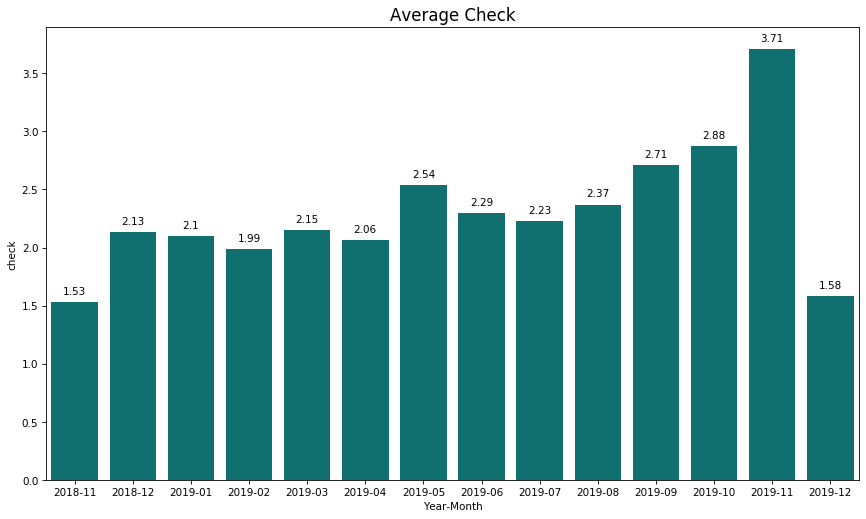

In [59]:
# Plotting the average check
fig, ax = plt.subplots(figsize=(14,8), dpi=75)
sns.barplot(data=check, x='label', y='check', color='teal')

# Creating label on top of each bar
for row in check.itertuples():
    ax.text(row.Index, 
            row.check+0.05, 
            s=round(row.check, 2), 
            horizontalalignment='center',
            verticalalignment='bottom')
    
plt.title('Average Check', fontdict={'size':16})
plt.xlabel('Year-Month')
plt.show()

In [60]:
print('The average check is {:.2f}'.format(check.check.mean()))

The average check is 2.30


In general, our customers generate an average check(transactions per customer on monthly basis) of 2.30. The highest figure was in November 2019 where there are 3.71 invoices per user. However, there was a massive drop in the month after, where the sales made only 1.58 invoices per user.

### Average revenue per unit by customers

Average Revenue Per Paying User (ARPPU) is the metric that shows how much money a single user makes. The figure is calculated by dividing the revenue by the number of paying customers per month.

In [61]:
# Calculating the ARPPU
arppu = pd.merge(revenue, customer, on=['year', 'month', 'invoice_date', 'label'], how='left')
arppu.columns = ['year', 'month', 'revenue', 'invoice_date', 'label', 'growth', 'color', 'n_customer']
arppu['arppu'] = arppu['revenue']/arppu['n_customer']
arppu

year  month       revenue        invoice_date    label    growth  \
0   2018     11  1.047652e+05 2018-11-29 08:26:00  2018-11  0.000000   
1   2018     12  6.694826e+05 2018-12-01 09:31:00  2018-12  5.390312   
2   2019      1  7.175487e+05 2019-01-02 10:00:00  2019-01  0.071796   
3   2019      2  5.017269e+05 2019-02-01 08:18:00  2019-02 -0.300776   
4   2019      3  6.707474e+05 2019-03-01 08:24:00  2019-03  0.336877   
5   2019      4  4.967570e+05 2019-04-01 10:10:00  2019-04 -0.259398   
6   2019      5  7.835728e+05 2019-05-01 08:35:00  2019-05  0.577376   
7   2019      6  6.979084e+05 2019-06-01 07:48:00  2019-06 -0.109325   
8   2019      7  7.193738e+05 2019-07-01 10:11:00  2019-07  0.030757   
9   2019      8  7.526335e+05 2019-08-01 08:21:00  2019-08  0.046234   
10  2019      9  9.613187e+05 2019-09-02 10:35:00  2019-09  0.277273   
11  2019     10  1.162657e+06 2019-10-01 08:30:00  2019-10  0.209440   
12  2019     11  1.483943e+06 2019-11-01 08:39:00  2019-11  0.276337   
13  2019     12  5.074703e+05 2019-12-02 10:10:00  2019-12 -0.658026   

          color  n_customer        arppu  
0   forestgreen         182   575.633239  
1   forestgreen         630  1062.670790  
2   forestgreen         592  1212.075582  
3     firebrick         551   910.575223  
4   forestgreen         694   966.494751  
5     firebrick         604   822.445360  
6   forestgreen         708  1106.741238  
7     firebrick         664  1051.066922  
8   forestgreen         696  1033.583084  
9   forestgreen         614  1225.787470  
10  forestgreen         648  1483.516582  
11  forestgreen         780  1490.585863  
12  forestgreen         788  1883.175954  
13    firebrick         375  1353.254035

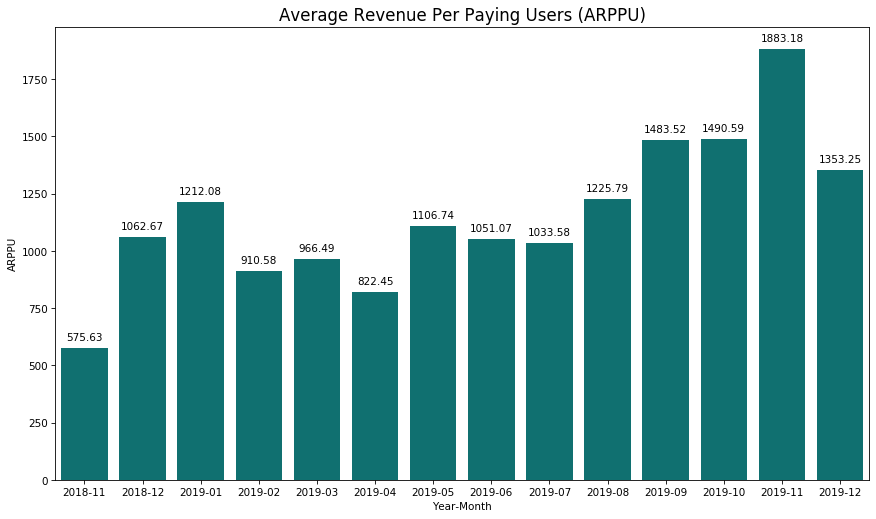

In [62]:
# Plotting the ARPPU
fig, ax = plt.subplots(figsize=(14,8), dpi=75)
sns.barplot(data=arppu, x='label', y='arppu', color='teal')

# Creating label on top of each bar
for row in arppu.itertuples():
    ax.text(row.Index, 
            row.arppu+25, 
            s=round(row.arppu, 2), 
            horizontalalignment='center',
            verticalalignment='bottom')

plt.title('Average Revenue Per Paying Users (ARPPU)', fontdict={'size':16})
plt.xlabel('Year-Month')
plt.ylabel("ARPPU")
plt.show()

In [63]:
print('The average revenue per paying user (ARPPU) is {:.2f}'.format(arppu.arppu.mean()))

The average revenue per paying user (ARPPU) is 1155.54


The graph above shows how much money a single user made from their purchase. In general, we can say that one customer generates 1155 of revenue. The top ARPPU was on November 2019 with 1883 points.

### Average revenue per unit

Average Revenue Per Unit is the amount of money we can expect to receive from selling a single product. It is calculated by dividing the monthly revenue by the number of products sold in a month.

We get the number of product by calculating the sum of product quantity om each month,

In [64]:
# Calculating the quantity if products sold
quantity = (clean_data
             .groupby(['year', 'month', 'stock_code'])
             .agg({'quantity':'sum', 'invoice_date':'min'})
             .reset_index()
             .groupby(['year', 'month'])
             .agg({'quantity':'sum', 'invoice_date':'min'})
             .reset_index()
            )
quantity['label'] = quantity['invoice_date'].dt.strftime('%Y-%m')
quantity

year  month  quantity        invoice_date    label
0   2018     11     58127 2018-11-29 08:26:00  2018-11
1   2018     12    302266 2018-12-01 09:31:00  2018-12
2   2019      1    420922 2019-01-02 10:00:00  2019-01
3   2019      2    280917 2019-02-01 08:18:00  2019-02
4   2019      3    380226 2019-03-01 08:24:00  2019-03
5   2019      4    296206 2019-04-01 10:10:00  2019-04
6   2019      5    419083 2019-05-01 08:35:00  2019-05
7   2019      6    375286 2019-06-01 07:48:00  2019-06
8   2019      7    424104 2019-07-01 10:11:00  2019-07
9   2019      8    442878 2019-08-01 08:21:00  2019-08
10  2019      9    533976 2019-09-02 10:35:00  2019-09
11  2019     10    661617 2019-10-01 08:30:00  2019-10
12  2019     11    773061 2019-11-01 08:39:00  2019-11
13  2019     12    257698 2019-12-02 10:10:00  2019-12

In [65]:
# Merging the dataframes and calculating the ARPU
arpu = pd.merge(quantity, revenue, on=['year', 'month', 'invoice_date', 'label'], how='left')
arpu['arpu'] = arpu['revenue']/arpu['quantity']
arpu

year  month  quantity        invoice_date    label       revenue  \
0   2018     11     58127 2018-11-29 08:26:00  2018-11  1.047652e+05   
1   2018     12    302266 2018-12-01 09:31:00  2018-12  6.694826e+05   
2   2019      1    420922 2019-01-02 10:00:00  2019-01  7.175487e+05   
3   2019      2    280917 2019-02-01 08:18:00  2019-02  5.017269e+05   
4   2019      3    380226 2019-03-01 08:24:00  2019-03  6.707474e+05   
5   2019      4    296206 2019-04-01 10:10:00  2019-04  4.967570e+05   
6   2019      5    419083 2019-05-01 08:35:00  2019-05  7.835728e+05   
7   2019      6    375286 2019-06-01 07:48:00  2019-06  6.979084e+05   
8   2019      7    424104 2019-07-01 10:11:00  2019-07  7.193738e+05   
9   2019      8    442878 2019-08-01 08:21:00  2019-08  7.526335e+05   
10  2019      9    533976 2019-09-02 10:35:00  2019-09  9.613187e+05   
11  2019     10    661617 2019-10-01 08:30:00  2019-10  1.162657e+06   
12  2019     11    773061 2019-11-01 08:39:00  2019-11  1.483943e+06   
13  2019     12    257698 2019-12-02 10:10:00  2019-12  5.074703e+05   

      growth        color      arpu  
0   0.000000  forestgreen  1.802351  
1   5.390312  forestgreen  2.214879  
2   0.071796  forestgreen  1.704707  
3  -0.300776    firebrick  1.786033  
4   0.336877  forestgreen  1.764075  
5  -0.259398    firebrick  1.677066  
6   0.577376  forestgreen  1.869732  
7  -0.109325    firebrick  1.859671  
8   0.030757  forestgreen  1.696220  
9   0.046234  forestgreen  1.699415  
10  0.277273  forestgreen  1.800303  
11  0.209440  forestgreen  1.757296  
12  0.276337  forestgreen  1.919567  
13 -0.658026    firebrick  1.969244

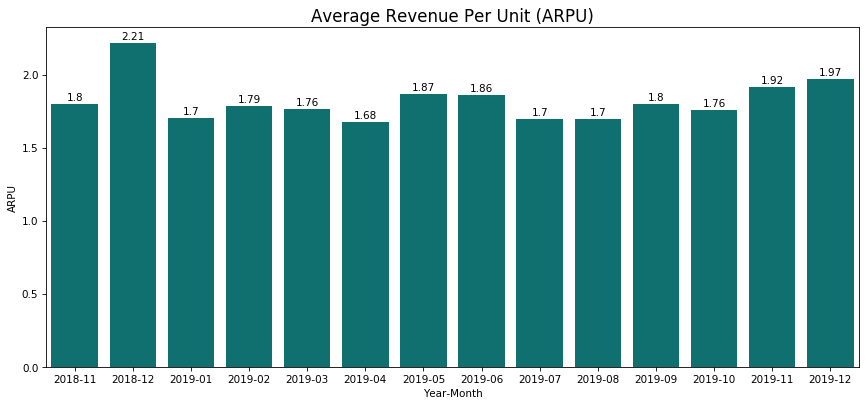

In [66]:
fig, ax = plt.subplots(figsize=(14,6), dpi=75)
sns.barplot(data=arpu, x='label', y='arpu', color='teal')

for row in arpu.itertuples():
    ax.text(row.Index, 
            row.arpu+0.01, 
            s=round(row.arpu, 2), 
            horizontalalignment='center',
            verticalalignment='bottom')
    
plt.title('Average Revenue Per Unit (ARPU)', fontdict={'size':16})
plt.xlabel('Year-Month')
plt.ylabel('ARPU')
plt.show()

In [67]:
print('The average revenue per user (ARPU) is {:.2f}'.format(arpu.arpu.mean()))

The average revenue per user (ARPU) is 1.82


The graph shows that the sales generate a relatively stable revenue per unit, which on average is 1.82. There is a relatively high figure in December 2018, where the ARPU was 2.21 points.

### Product performance based on revenue

In [68]:
def show_top(n_highest):
    '''
    Description:
    Display of top n products based on revenue.
    '''
    result = (clean_data
              .groupby(['stock_code', 'description'])
              .sum()['revenue']
              .sort_values(ascending=False)
              .head(n_highest).reset_index()
             )
    fig, ax = plt.subplots(figsize=(10,round(n_highest*0.5)), dpi=75)
    sns.barplot(data=result, y=result.description.map(lambda x: x.title()), x='revenue', color='teal', orient='h')
    
    for row in result.itertuples():
        ax.text(row.revenue+10000,
                row.Index,
                s=round(row.revenue, 2), 
                horizontalalignment='center',
                verticalalignment='bottom')
    plt.title('The Top {} Products Based on Revenue'.format(n_highest), fontdict={'size':16})
    plt.xlabel('Revenue')
    plt.xlim(0, result.revenue.max()+25000)
    plt.ylabel('Item Name')
    plt.show()
    

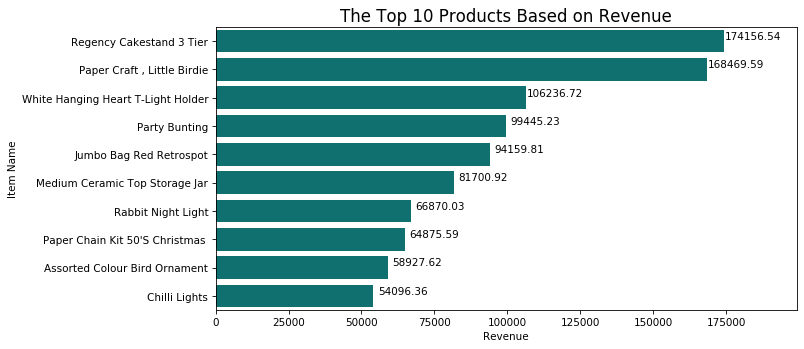

In [69]:
#showing the top 10 products
show_top(10)

It can be observed that the top performers in terms of revenue are Regency Cakestand 3 tier, Paper Craft, Little birdie, white hanging T-light shirt

## Product Analysis 

It can be concluded from the analysis of the product range that the most amount of the sales have happened around the month of november according to the average revenue per unit and through the average check

In [70]:
# Extracting `day` from `invoice_date`
clean_data['day'] = clean_data['invoice_date'].dt.day
clean_data

invoice_no stock_code                          description  quantity  \
0          536365     85123A   white hanging heart t-light holder         6   
1          536365      71053                  white metal lantern         6   
2          536365     84406B       cream cupid hearts coat hanger         8   
3          536365     84029G  knitted union flag hot water bottle         6   
4          536365     84029E       red woolly hottie white heart.         6   
...           ...        ...                                  ...       ...   
541904     581587      22613          pack of 20 spaceboy napkins        12   
541905     581587      22899         children's apron dolly girl          6   
541906     581587      23254        childrens cutlery dolly girl          4   
541907     581587      23255      childrens cutlery circus parade         4   
541908     581587      22138        baking set 9 piece retrospot          3   

              invoice_date  unit_price customer_id is_debt  year  month  day  \
0      2018-11-29 08:26:00        2.55       17856   False  2018     11   29   
1      2018-11-29 08:26:00        3.39       17856   False  2018     11   29   
2      2018-11-29 08:26:00        2.75       17856   False  2018     11   29   
3      2018-11-29 08:26:00        3.39       17856   False  2018     11   29   
4      2018-11-29 08:26:00        3.39       17856   False  2018     11   29   
...                    ...         ...         ...     ...   ...    ...  ...   
541904 2019-12-07 12:50:00        0.85       12680   False  2019     12    7   
541905 2019-12-07 12:50:00        2.10       12680   False  2019     12    7   
541906 2019-12-07 12:50:00        4.15       12680   False  2019     12    7   
541907 2019-12-07 12:50:00        4.15       12680   False  2019     12    7   
541908 2019-12-07 12:50:00        4.95       12680   False  2019     12    7   

          revenue  
0       15.300000  
1       20.340001  
2       22.000000  
3       20.340001  
4       20.340001  
...           ...  
541904  10.200000  
541905  12.599999  
541906  16.600000  
541907  16.600000  
541908  14.849999  

[523277 rows x 12 columns]

Finding the day with the highest revenue

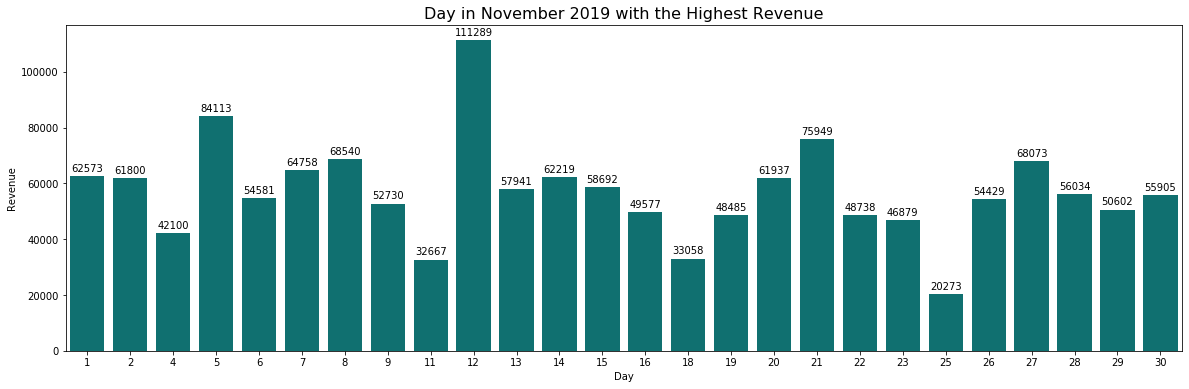

In [71]:
# Finding the day in November 2019 with the highest revenue
day_revenue = clean_data.query('year == 2019 and month == 11').groupby(['day']).sum()['revenue'].reset_index()

# Plotting the graph
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(data=day_revenue, x='day', y='revenue', color='teal')

for row in day_revenue.itertuples():
    ax.text(row.Index, 
            row.revenue+1000, 
            s=round(row.revenue), 
            horizontalalignment='center',
            verticalalignment='bottom')
    
plt.title('Day in November 2019 with the Highest Revenue', fontdict={'size':16})
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

We can find that the most revenue was found to be in the day of 12th November now in the next step I will found out the most popular items for purchase during this period

In [72]:
# Finding the most profitable items sold in Nov 12, 2019
(clean_data
 .query('year == 2019 and month == 11')
 .groupby(['day', 'stock_code'])
 .sum()
 .reset_index()
 .query('day == 12')
 .groupby('stock_code')
 .sum()
 .sort_values(by='revenue', ascending=False)
 .head()
)

day  quantity  unit_price   year  month      revenue
stock_code                                                      
22086        12       914   46.830002  26247    143  5483.699861
23084        12       686   51.860001  44418    242  2774.579924
22197        12      1767   14.890000  30285    165  2708.030070
22158        12       430   30.040001  16152     88  2552.579937
23344        12       539   25.430000  20190    110  2225.359919

In [73]:
print('Item with stock_code 22086: {}'.format(clean_data
                                              .query('stock_code == "22086"')
                                              .description
                                              .unique()[0].title())
     )

Item with stock_code 22086: Paper Chain Kit 50'S Christmas 


Through the above analysis I found out that the most sold item on the day of maximum revenue generated was paper chain kit 50's christmas

In [74]:
# Finding the most profitable items sold in Nov 2019
top_10_nov = (clean_data
              .query('year == 2019 and month == 11')
              .groupby(['day', 'stock_code'])
              .sum()
              .reset_index()
              .groupby('stock_code')
              .sum()
              .sort_values(by='revenue', ascending=False)
              .reset_index()
              .head(10)
             )
top_10_nov

stock_code  day  quantity   unit_price     year  month       revenue
0      23084  411     14871  1142.049927  1039785   5665  34634.209425
1      22086  411      8106  1334.180054   835866   4554  29559.979744
2      22197  411     13642   253.720001   514845   2805  15148.880418
3     85123A  411      4981   889.849976   545130   2970  14458.470020
4      22423  411      1080  3064.320068   419952   2288  14151.119786
5      22910  411      3675   994.609985   593586   3234  12710.029912
6      23355  411      2420  1621.569946   611757   3333  12245.119898
7     85099B  411      6222   592.309998   504750   2750  12203.359734
8      79321  411      2221   833.019958   232185   1265  12101.739787
9      23344  411      4175   650.809998   563301   3069  11267.819641

the above analysis helps to find in general the top 10 items that have generated the maximum revenue in the month of novemebr

In [75]:
# Finding the names
for item in top_10_nov.stock_code:
    print('Item with stock_code={}: {}'.format(item, clean_data.query('stock_code == @item').description.unique()[0].title()))

Item with stock_code=23084: Rabbit Night Light
Item with stock_code=22086: Paper Chain Kit 50'S Christmas 
Item with stock_code=22197: Small Popcorn Holder
Item with stock_code=85123A: White Hanging Heart T-Light Holder
Item with stock_code=22423: Regency Cakestand 3 Tier
Item with stock_code=22910: Paper Chain Kit Vintage Christmas
Item with stock_code=23355: Hot Water Bottle Keep Calm
Item with stock_code=85099B: Jumbo Bag Red Retrospot
Item with stock_code=79321: Chilli Lights
Item with stock_code=23344: Jumbo Bag 50'S Christmas 


We can foud out that the most revenue generated in the month of november through the following items rabbit night light, paper chain kit 50's kit, small popcorn holder which is also the month of maximum revenue generated

In [76]:
# Finding the most profitable items sold in Dec 2019
top_10_dec = (clean_data
              .query('year == 2019 and month == 12')
              .groupby(['day', 'stock_code'])
              .sum()
              .reset_index()
              .groupby('stock_code')
              .sum()
              .sort_values(by='revenue', ascending=False)
              .reset_index()
              .head(10)
             )

for item in top_10_dec.stock_code:
    print('Item with stock_code={}: {}'.format(item, clean_data.query('stock_code == @item').description.unique()[0].title()))

Item with stock_code=23843: Paper Craft , Little Birdie
Item with stock_code=23084: Rabbit Night Light
Item with stock_code=21137: Black Record Cover Frame
Item with stock_code=22086: Paper Chain Kit 50'S Christmas 
Item with stock_code=22423: Regency Cakestand 3 Tier
Item with stock_code=22197: Small Popcorn Holder
Item with stock_code=22413: Metal Sign Take It Or Leave It 
Item with stock_code=22727: Alarm Clock Bakelike Red 
Item with stock_code=22114: Hot Water Bottle Tea And Sympathy
Item with stock_code=23543: Keep Calm Wall Art 


The most profitable items for December include Paper Craft, Little Birdie as first, Rabbit Night Light as second and Black record cover frame as third.

## Product Range Analysis

In [77]:
word_list = clean_data['description'].unique()
display(word_list)

array(['white hanging heart t-light holder', 'white metal lantern',
       'cream cupid hearts coat hanger', ..., 'letter "u" bling key ring',
       'cream hanging heart t-light holder',
       'paper craft , little birdie'], dtype=object)

the above consists of the list with the product description of all the unique characters

In [78]:
product_type_list = clean_data['description'].unique()
purpose_string = ' '.join(product_type_list)
lemmas = m.lemmatize(purpose_string)

In [79]:
clean_data['lemmas_product'] = " "

clean_data['lemmas_product'] = clean_data['description'].apply(lambda x: ' '.join(m.lemmatize(x)).strip())
clean_data['product_group'] = " "
clean_data.head(5)

invoice_no stock_code                          description  quantity  \
0     536365     85123A   white hanging heart t-light holder         6   
1     536365      71053                  white metal lantern         6   
2     536365     84406B       cream cupid hearts coat hanger         8   
3     536365     84029G  knitted union flag hot water bottle         6   
4     536365     84029E       red woolly hottie white heart.         6   

         invoice_date  unit_price customer_id is_debt  year  month  day  \
0 2018-11-29 08:26:00        2.55       17856   False  2018     11   29   
1 2018-11-29 08:26:00        3.39       17856   False  2018     11   29   
2 2018-11-29 08:26:00        2.75       17856   False  2018     11   29   
3 2018-11-29 08:26:00        3.39       17856   False  2018     11   29   
4 2018-11-29 08:26:00        3.39       17856   False  2018     11   29   

     revenue                                 lemmas_product product_group  
0  15.300000   white   hanging   heart   t - light   holder                
1  20.340001                        white   metal   lantern                
2  22.000000         cream   cupid   hearts   coat   hanger                
3  20.340001  knitted   union   flag   hot   water   bottle                
4  20.340001        red   woolly   hottie   white   heart .

Here I have added a group called as the lemmas product to help create product group bascially which will be used to classiy our range of products into different categories based on the key words which will be extracctred using lemmatization within the lemmas product group name.

In [80]:
categories = {
    'Dishes and utensils': ['plate','whisk', 'bone', 'fork', 'frying pan',
                                          'rolling pin', 'grater', 'masher', 'dish', 'thermos', 'stewpan','bottle',
                                                    'spoon', 'mug', 'ladle', 'Luminarc', 'Luminarc','cutlery','cakestand',
                                                    'knife', 'tablecloth', 'cauldron', 'thermocup','mug','tongs',
                                                    'napkin holder', 'table', 'serving', 'brewing','cups','plates',
                                                    'breadbox', 'kitchen', 'pot', 'dishes', 'jug','napkins','bowl',
                                                    'cake maker', 'container', 'peeler', 'jar', 'bowl', 'kitchen',
                                                    'microwave', 'jar', 'infuser', 'salad bowl', 'colander'], # and other products from the category of kitchen utensils
    'Plants (indoor, seedlings, other)': ['pelargonium', 'cassette', 'seedlings', 'plant', 'd -', 'plant',
                                              'calibrachoa', 'decembrist', 'variety', 'petunia', 'ampel','cactus',
                                              'rose', 'carnation', 'tree', 'pot', 'cyclamen', 'Netherlands', 'primula',
                                              'fern', 'ivy', 'liana', 'hosta', 'fuchsia'], # similar products from this category
    'Dryers': ['dryer'],
    'Storage': ['clothes', 'suit', 'hangers', 'hanger', 'rack', 'case', 'shoe box', 'basket','holder','boxes','warmer','woolly','apron','cases','box','racks','clock','racks',
                       'basket', 'whatnot', 'storage', 'tank','drawer','hook','umberella','decoration','wallet','bunting','bank','chest','cabinet','stand'],
    'Bedding, textiles, blankets, mattress covers': ['sheet', 'blanket', 'mattress', 'duvet cover',
                                                                  'pillowcase', 'towel', 'bedspread', 'mattress cover',
                                                                  'plaid', 'matrix', 'linen'],
    'Decor, interior, furniture': ['artificial', 'artificial', 'flower', 'puff', 'chest of drawers', 'interior', 'dummy','lantern','wicker','sign','lantern','garland',
                                'decorative', 'lamp'],
    'Trolley bags': ['wheel', 'bag', 'trolley','bags'],

    'kids toys': ['blocks', 'jigsaw', 'doll', 'ducks', 'dolly','fairy','pencils','drawing','gift','cards','sticks','calculator','globe','card','slate','letters','writing','marker','ornament','craft','birdie'],
    'All for repair': ['ladder', 'bracket', 'spring', 'fastener', 'corner', 'wrap', 'espagnolette', 'hook','sewing',
                        'loop', 'screed', 'tool', 'shelf', 'shelf', 'halyard', 'file', 'nozzle roller'],

    'Ironing boards': ['board', 'lining', 'case', 'ironing', 'sleeve'],
    'Ruffs for the toilet bowl and plungers': ['ruff', 'plunger'],
    'Tases, troughs, buckets, ladles': ['basin', 'bucket', 'trough', 'ladle'],
    'Bath products': ['bathroom', 'robe', 'bath', 'dental', 'cornice', 'anti-slip', 'soap','bath'],
    'Everything for cleaning': ['broom', 'scoop', 'mop', 'garbage', 'garbage', 'napkin', 'brush', 'glove', 'basting', 'garbage',
                       'window washer', 'rag', 'microfibers'],
    'Urns, thermometers, doormats': ['urn', 'doorway', 'thermometer', 'rug', 'moisture-absorbing','doormat'],
    'Small appliances': ['kettle', 'electric corkscrew', 'vacuum cleaner', 'pressure cooker', 'mixer', 'vegetable cooker', 'scales',
                               'steamer', 'juice cooker', 'iron', 'hair dryer']
}

In [81]:
def classify(lemmas_product):
    
    
    for category, product_list in categories.items():
              
        for product in product_list:
            if product in lemmas_product:
                return category
             
    return 'other'

In [82]:
clean_data['product_group'] = clean_data.lemmas_product.apply(classify)
display(clean_data.head(10))

invoice_no stock_code                          description  quantity  \
0     536365     85123A   white hanging heart t-light holder         6   
1     536365      71053                  white metal lantern         6   
2     536365     84406B       cream cupid hearts coat hanger         8   
3     536365     84029G  knitted union flag hot water bottle         6   
4     536365     84029E       red woolly hottie white heart.         6   
5     536365      22752         set 7 babushka nesting boxes         2   
6     536365      21730    glass star frosted t-light holder         6   
7     536366      22633               hand warmer union jack         6   
8     536366      22632            hand warmer red polka dot         6   
9     536367      84879        assorted colour bird ornament        32   

         invoice_date  unit_price customer_id is_debt  year  month  day  \
0 2018-11-29 08:26:00        2.55       17856   False  2018     11   29   
1 2018-11-29 08:26:00        3.39       17856   False  2018     11   29   
2 2018-11-29 08:26:00        2.75       17856   False  2018     11   29   
3 2018-11-29 08:26:00        3.39       17856   False  2018     11   29   
4 2018-11-29 08:26:00        3.39       17856   False  2018     11   29   
5 2018-11-29 08:26:00        7.65       17856   False  2018     11   29   
6 2018-11-29 08:26:00        4.25       17856   False  2018     11   29   
7 2018-11-29 08:28:00        1.85       17856   False  2018     11   29   
8 2018-11-29 08:28:00        1.85       17856   False  2018     11   29   
9 2018-11-29 08:34:00        1.69       13048   False  2018     11   29   

     revenue                                 lemmas_product  \
0  15.300000   white   hanging   heart   t - light   holder   
1  20.340001                        white   metal   lantern   
2  22.000000         cream   cupid   hearts   coat   hanger   
3  20.340001  knitted   union   flag   hot   water   bottle   
4  20.340001        red   woolly   hottie   white   heart .   
5  15.300000           set   7   babushka   nesting   boxes   
6  25.500000    glass   star   frosted   t - light   holder   
7  11.100000                   hand   warmer   union   jack   
8  11.100000              hand   warmer   red   polka   dot   
9  54.080002            assorted   colour   bird   ornament   

                product_group  
0                     Storage  
1  Decor, interior, furniture  
2                     Storage  
3         Dishes and utensils  
4                     Storage  
5                     Storage  
6                     Storage  
7                     Storage  
8                     Storage  
9                   kids toys

the above list consists of the data on the top 10 entries with every entry classified into a product group based on the utility or type of the product which will be used further for the analysis

In [83]:
clean_data.groupby('product_group').agg({'customer_id':'nunique',
                                  'quantity':'sum', 
                                  'stock_code':'count',
                                  'description':'nunique',
                                  'unit_price':'mean',
                                  'revenue':'sum'}).round(2)

customer_id  quantity  \
product_group                                                         
All for repair                                       1146    120827   
Bath products                                         728     10420   
Bedding, textiles, blankets, mattress covers          750     17658   
Decor, interior, furniture                           1598    550452   
Dishes and utensils                                  1777   1036830   
Everything for cleaning                               859     19110   
Ironing boards                                        601     15601   
Plants (indoor, seedlings, other)                    1339    127993   
Small appliances                                      219     14711   
Storage                                              1779   1134533   
Tases, troughs, buckets, ladles                       504      6422   
Trolley bags                                         1521    363493   
Urns, thermometers, doormats                         1121     37973   
kids toys                                            1482    561916   
other                                                2169   1608428   

                                              stock_code  description  \
product_group                                                           
All for repair                                      7633           66   
Bath products                                       2278           16   
Bedding, textiles, blankets, mattress covers        2119           22   
Decor, interior, furniture                         50321          332   
Dishes and utensils                               105031          595   
Everything for cleaning                             2865           28   
Ironing boards                                      1637            9   
Plants (indoor, seedlings, other)                  15553          179   
Small appliances                                     311            3   
Storage                                           103337          658   
Tases, troughs, buckets, ladles                     1075            9   
Trolley bags                                       31037          133   
Urns, thermometers, doormats                        6917           35   
kids toys                                          42247          286   
other                                             150916         1680   

                                              unit_price     revenue  
product_group                                                         
All for repair                                      3.06   136217.80  
Bath products                                       5.24    40056.66  
Bedding, textiles, blankets, mattress covers        2.78    43164.11  
Decor, interior, furniture                          2.54   864663.86  
Dishes and utensils                                 3.84  2287642.51  
Everything for cleaning                             2.34    30267.13  
Ironing boards                                      6.62    76048.85  
Plants (indoor, seedlings, other)                   3.40   224749.71  
Small appliances                                    0.57     3580.21  
Storage                                             3.49  2155975.88  
Tases, troughs, buckets, ladles                     3.83    16235.62  
Trolley bags                                        2.41   670346.77  
Urns, thermometers, doormats                        8.50   242857.14  
kids toys                                           2.17   770846.84  
other                                               3.14  2667252.00

the above table describes the net quantity and results for the different product categories and provides with net revenue based on the categories we have clssified it into

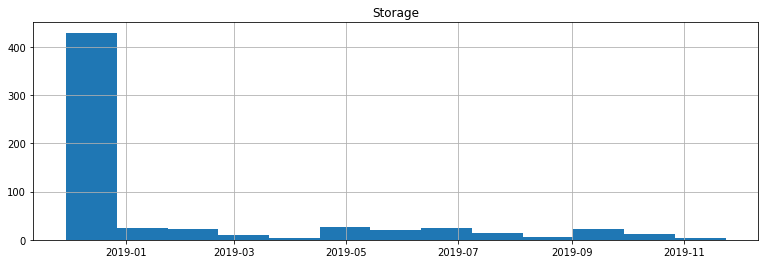

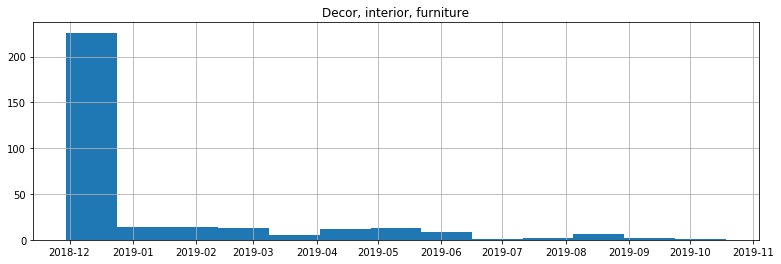

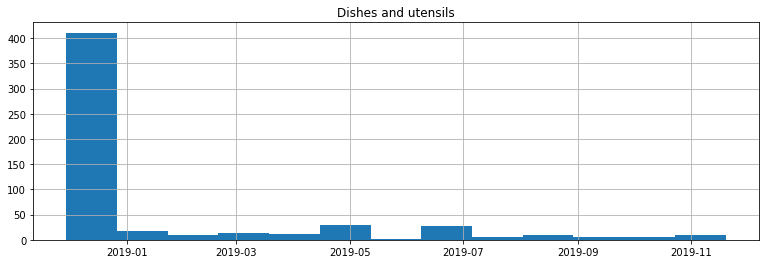

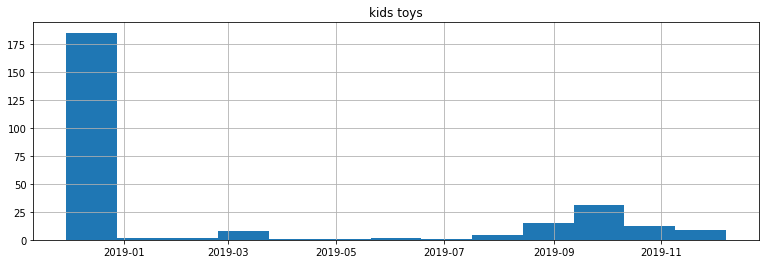

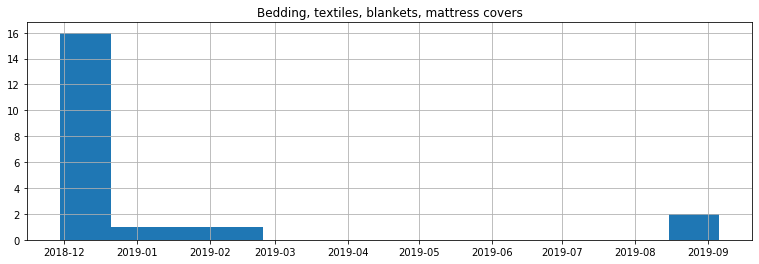

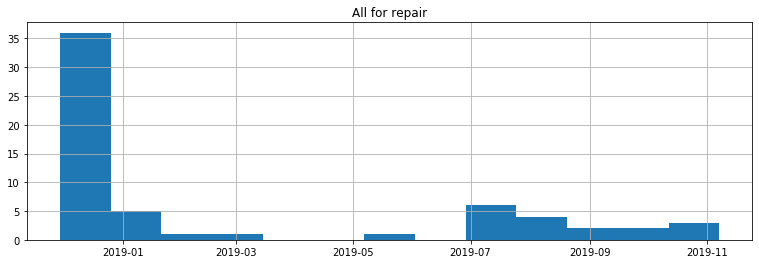

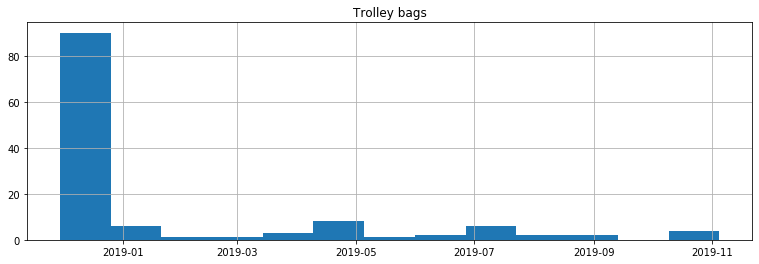

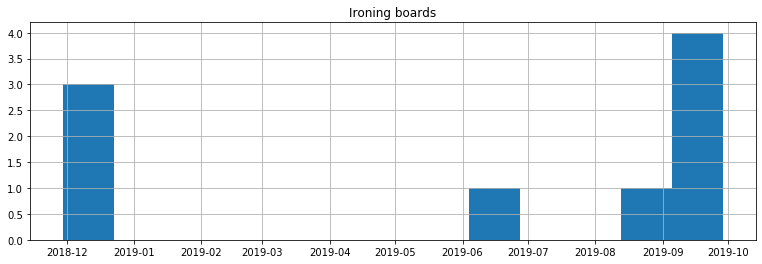

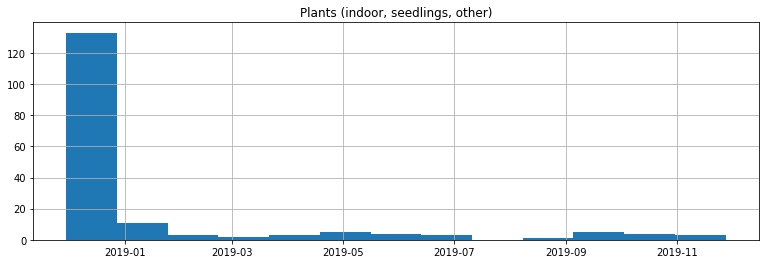

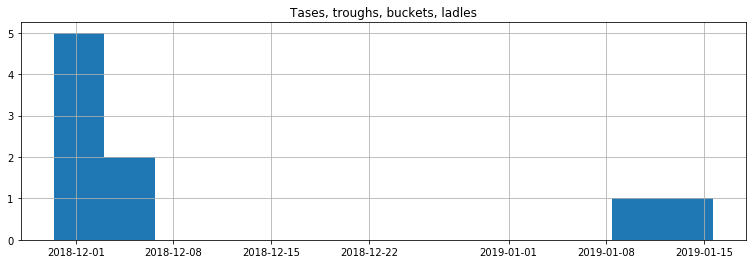

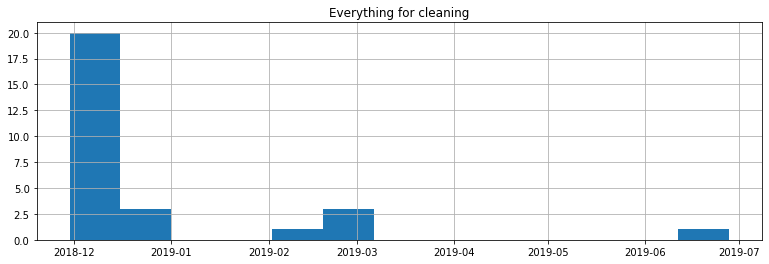

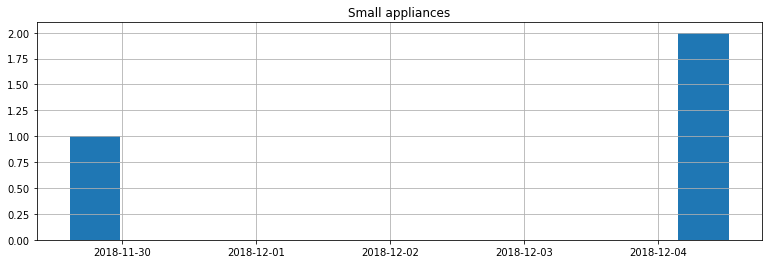

In [84]:
for product_group in  clean_data['product_group'].unique():
    plt.figure(figsize=(13, 4))
    clean_data[clean_data['product_group']==product_group].groupby('stock_code').agg({'invoice_date':'min'})['invoice_date'].hist(bins=13)
    plt.title(product_group)
    plt.show()

the above graphs helps into understanding the volume of product sold based on the category and date it was observed that in the case of everything for cleaning, tases bucket troughs, plants, small appliances,trolley bags and all for repairs, storage, bath products and other items mort of the volume is observed to be more during the december 2018 and january 2019 period which could be due to people buying more products during the christmas and new year period. While the category ironing board have more volume during september and october 2019.

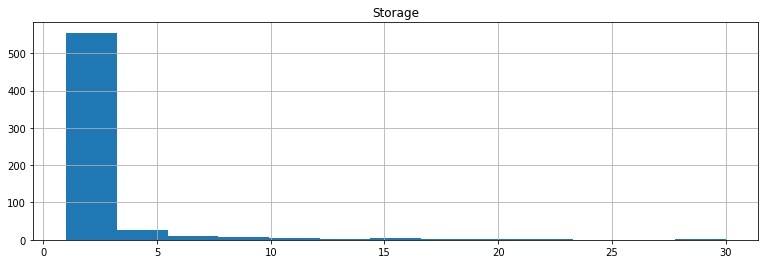

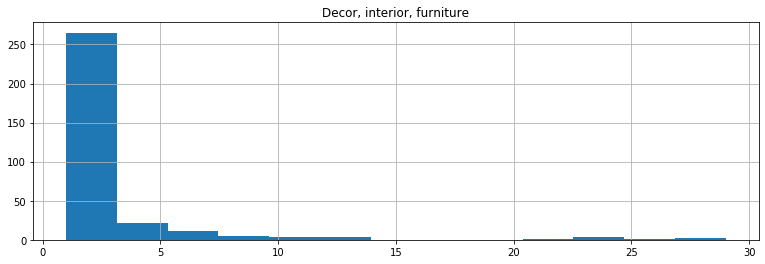

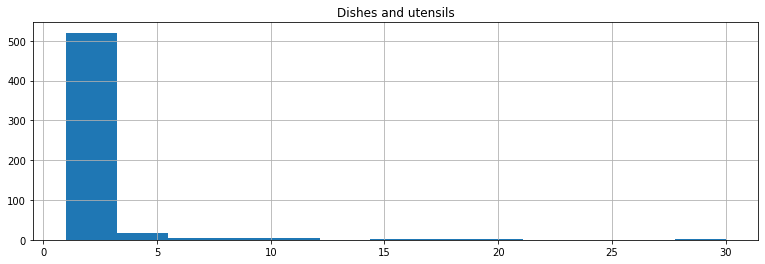

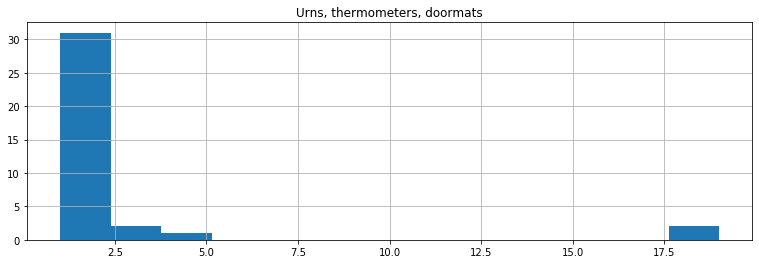

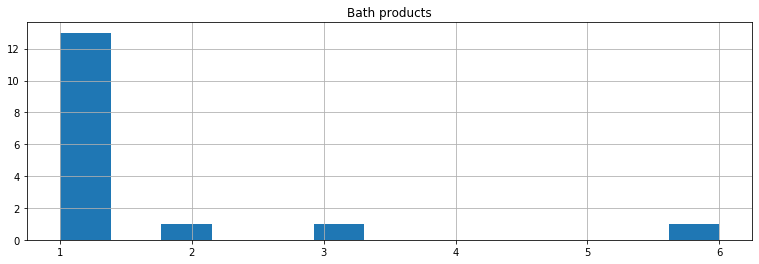

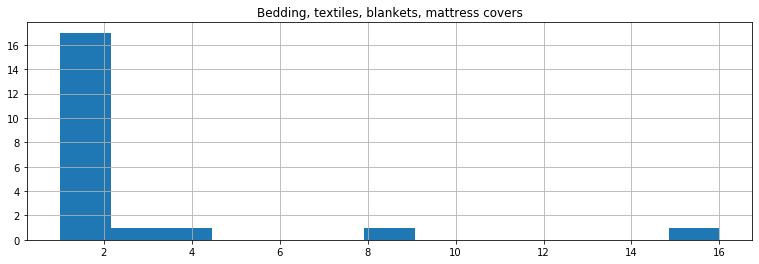

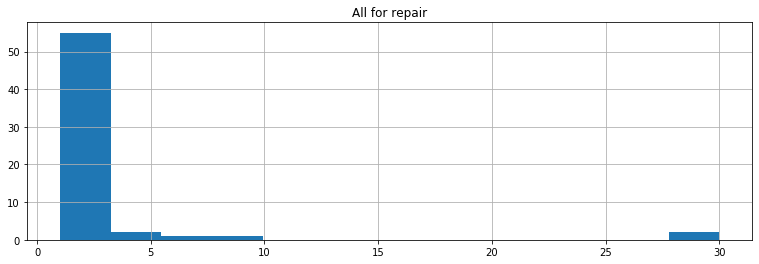

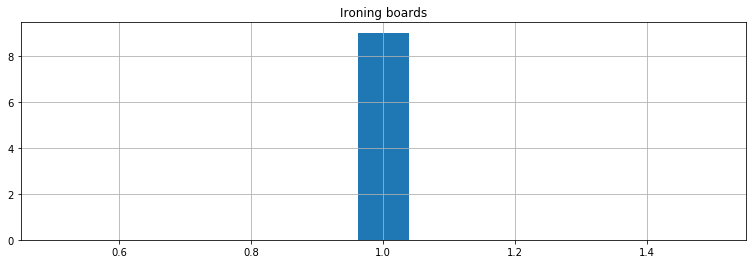

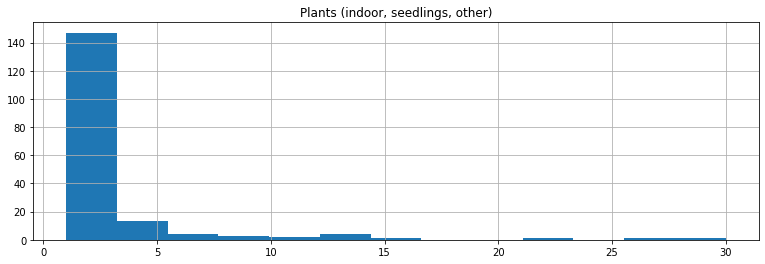

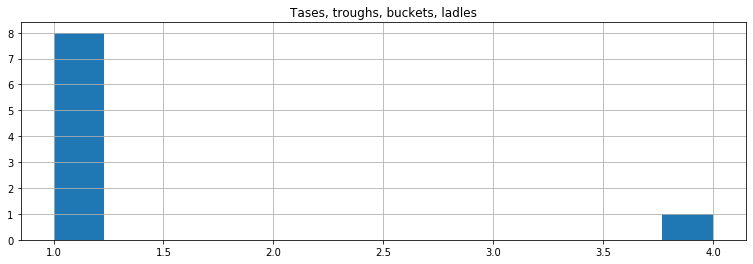

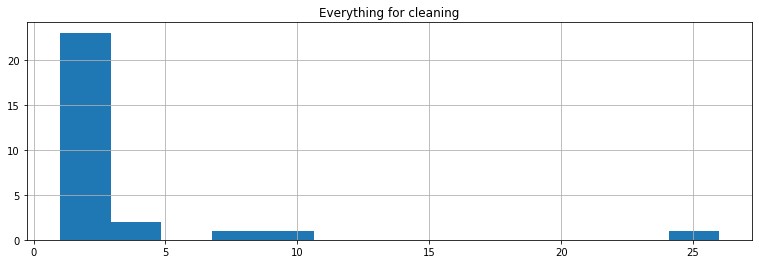

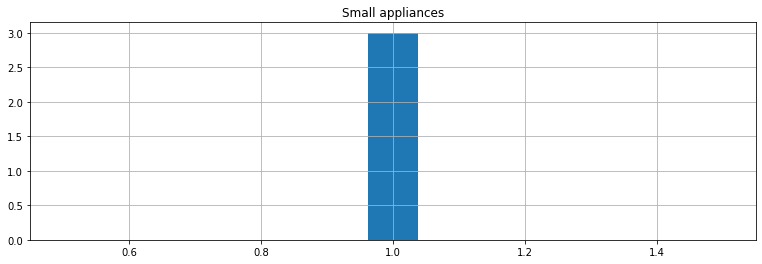

In [85]:
for product_group in  clean_data['product_group'].unique():
    plt.figure(figsize=(13, 4))
    clean_data[clean_data['product_group']==product_group].groupby('stock_code').agg({'day':'min'})['day'].hist(bins=13)
    plt.title(product_group)
    plt.show()

the above graphs help to understand the volume of products sold on the day of month to understand the popularity of the product it was observed that almost all the categories of product that maximum volume was during the first five days of the month which can be because most of the products in the analysis are utility products that are normally bought as per monthly usage.

In [86]:
temp = clean_data.groupby('product_group', as_index=False).agg({'quantity':'count'})

product_group = temp['product_group']
values = temp['quantity']

fig = go.Figure(data=[go.Pie(labels=product_group, values=values)])
fig.update_layout(
    title={
        'text': "Categories by the number of mentions in orders",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

the above pie chart helps understand the categories based on the volume of orders of different products after their classification onto different classes.

In [87]:
temp = clean_data.groupby('product_group', as_index=False).agg({'revenue':'sum'})

category = temp['product_group']
values = temp['revenue']

fig = go.Figure(data=[go.Pie(labels=product_group, values=values)])
fig.update_layout(
    title={
        'text': "Total revenue by category",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

the above pie chart provides the representation of different categories based on the revenue generated by them

In [88]:
temp = clean_data.groupby('product_group', as_index=False).agg({'revenue':'mean'})

category = temp['product_group']
values = temp['revenue']

fig = go.Figure(data=[go.Pie(labels=product_group, values=values)])
fig.update_layout(
    title={
        'text': "Average bill by category",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

The above pie chart helps us to understand the categories based on the average revenue generated by them 

In [89]:
order = clean_data.groupby(['month', 'product_group']).agg({'stock_code': 'count'}).sort_values(by = 'stock_code', ascending = False).reset_index()

fig = px.bar(order, x='month', y='stock_code', title='Graph of the number of orders by category', color='product_group', width=1000, height=500)
fig.show()

In the graph of number of orders by category it can be seen that most orders are from the month of november which coincides with the results obtained with my previous analysis. 

In [90]:
revenue = clean_data.groupby(['month', 'product_group']).agg({'revenue':'mean'}).sort_values(by = 'revenue', ascending = False).reset_index()

fig = px.bar(revenue, x='month', y='revenue', title='Revenue chart by category', color='product_group', width=1000, height=500)
fig.show()

The above bar chart provides an overview of revenue based on the diffent catefories showing the maximum during the end and start period of the year between december to february. 

### Product classification and further analysis

In [91]:
clean_data['daynos'] = clean_data['invoice_date'].dt.dayofweek
clean_data['year'] = clean_data['invoice_date'].dt.year
clean_data['month'] = clean_data['invoice_date'].dt.month

In [92]:
ml_data = clean_data.groupby('description', as_index=False).agg({'unit_price':'mean', 'quantity':'sum'})
ml_data.columns = ['description', 'unit_price', 'quantity']

temp = clean_data.groupby(['stock_code', 'description'], as_index=False).agg({'quantity':'mean'})
temp = temp.groupby('description', as_index=False).agg({'quantity':'mean'}).round(2)
ml_data = pd.merge(ml_data, temp, on='description')
ml_data.columns = ['description', 'unit_price', 'quantity', 'mean_quantity_in_order']
display(ml_data.head())

description  unit_price  quantity  \
0   4 purple flock dinner candles    2.450513       142   
1   50's christmas gift bag large    1.426589      1915   
2               dolly girl beaker    1.506420      2451   
3     i love london mini backpack    4.616667       388   
4     i love london mini rucksack    4.150000         1   

   mean_quantity_in_order  
0                    3.64  
1                   14.84  
2                   13.93  
3                    4.46  
4                    1.00

In [93]:
temp = clean_data[(clean_data['year']!=2019)|(clean_data['month']!=10)] 

I removed the last month to develop more comprehensive analysis and make it more even with all months with complete entries

In [94]:
temp = clean_data[(clean_data['year']!=2019)|(clean_data['month']!=10)] 
temp['season'] = temp['month'].map({12:'winter', 1:'winter',2:'winter',
                   3:'spring',4:'spring',5:'spring',
                   6:'summer',7:'summer',8:'summer',
                   9:'autumn',10:'autumn', 11:'autumn'})
temp['season'].value_counts()

autumn    134559
winter    118073
summer    108694
spring    100713
Name: season, dtype: int64

In [95]:
temp = pd.pivot_table(temp, columns='season', values='quantity', index='description', aggfunc='sum').reset_index()
temp['sum'] = temp.iloc[:,1:6].sum(axis=1)
temp['autumn'] = temp['autumn']/temp['sum']
temp['spring'] = temp['spring']/temp['sum']
temp['summer'] = temp['summer']/temp['sum']
temp['winter'] = temp['winter']/temp['sum']
del temp['sum']
temp = temp.fillna(0)
ml_data = pd.merge(ml_data, temp, on='description', how='left')

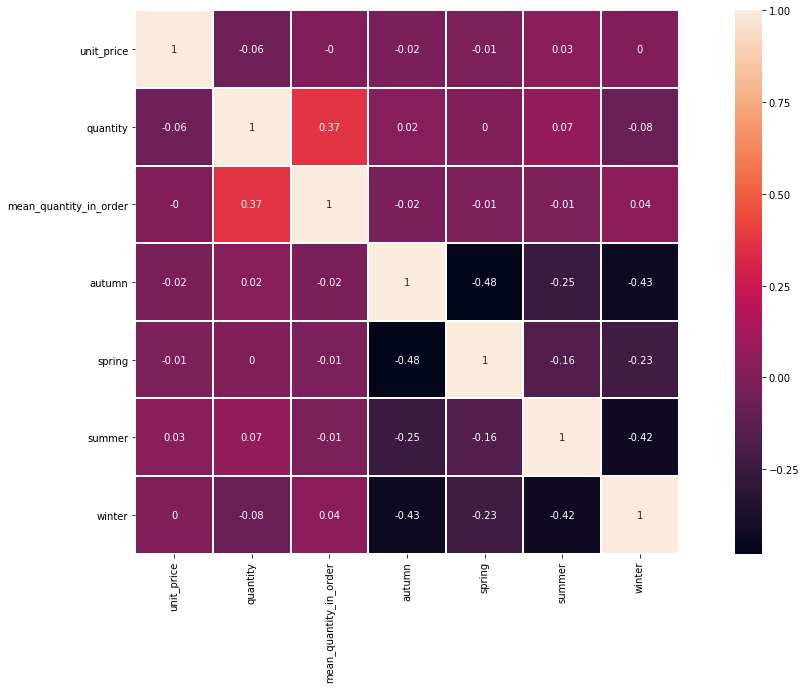

In [96]:
X = ml_data.drop('description', axis=1)
X = X.dropna()

scaler = StandardScaler()
x_sc = scaler.fit_transform(X)

plt.figure(figsize=(20, 10))
sns.heatmap(X.corr().round(2), annot = True, square=True, linewidths=1) 
plt.show()

the above chart helps identity the correlelation between the different seasons and the important perimeters like unit price, quantity and summer being crrelated more than other seasons for exmaple

In [97]:
linked = linkage(x_sc, method = 'ward')
linked.shape

(4015, 4)

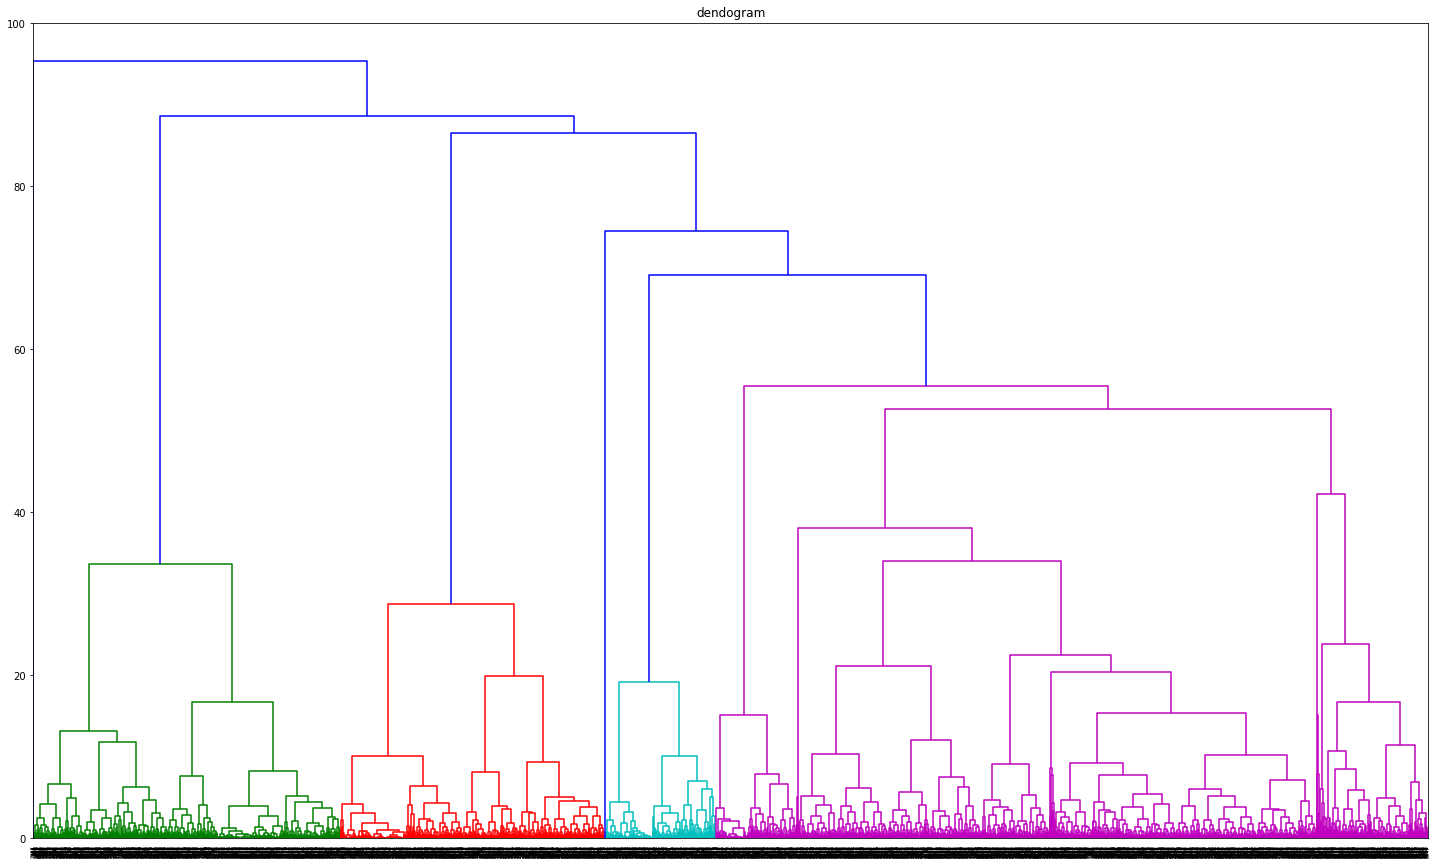

In [98]:
plt.figure(figsize=(25, 15))  
dendrogram(linked, orientation='top')
plt.title('dendogram')
plt.show()

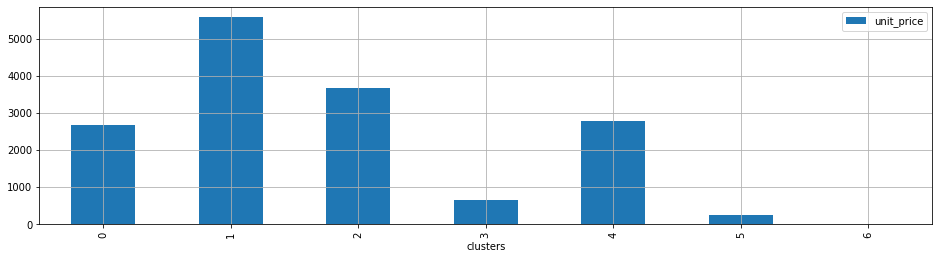

In [99]:
ml_data = ml_data.dropna()

km = KMeans(n_clusters = 7, random_state=0)

labels = km.fit_predict(x_sc)

ml_data['clusters'] = labels

ml_data.groupby('clusters').agg({'unit_price':'sum'}).plot(grid=True, kind='bar', figsize=(16, 4))

In [100]:
ml_data.groupby('clusters').agg({'quantity':'count'}).plot(grid=True, kind='bar', figsize=(16, 4))

In [101]:
temp = ml_data.drop(['description'], axis=1).groupby('clusters').mean().reset_index()
display(temp)

clusters  unit_price      quantity  mean_quantity_in_order    autumn  \
0         0    4.413885    515.655684               15.238764  0.067120   
1         1    3.459344   1387.610180               12.019745  0.217252   
2         2    4.259417    410.218351                9.830337  0.106819   
3         3  649.500000     61.000000               30.500000  0.000000   
4         4    3.504473    879.008816                9.148539  0.752356   
5         5    1.874982  13773.482270               29.136241  0.282844   
6         6    2.080000  80995.000000            80995.000000  0.000000   

     spring    summer    winter  
0  0.636406  0.094104  0.202370  
1  0.194259  0.394819  0.193670  
2  0.111735  0.070840  0.710606  
3  0.000000  1.000000  0.000000  
4  0.033787  0.072218  0.141639  
5  0.233471  0.270591  0.213093  
6  0.000000  0.000000  1.000000

the above data provides the major six clusters that our data has been classified based on the categories key parameters and the sale during different seasons

## Hypothesis testing

The two hypothesis that I have considered for testing based on the findings  consist of first to compare the relation between price of unit comparing it with the quantity of product sold keeping 3 as the unit to classify weather cheaper product has more sales compared to other products.
The next test provides comparison with two halfs of the month does sale happen more during the end half or the starting 15 days of the month as different factors like people receiving salary or utility purchase affect these factors with the revenue generated.

In [102]:
hyp11 = clean_data.query('unit_price > 3')['quantity']
hyp12 = clean_data.query('unit_price < 3')['quantity']

alpha = .05 

results = st.ttest_ind(
    hyp11, 
    hyp12,
    nan_policy ='omit'
)
    
print('p-value: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    priTnt("Fail to reject the null hypothesis")

p-value:  3.590614344733681e-95
Rejecting the null hypothesis


Accroding to the result we can reject the null hypothesis and declare that the results are not statistically significant and unit_price does not creat considerable effect into the quantity of product being purchased.

In [103]:
hypa = clean_data.query('day > 15')['revenue']
hypb =  clean_data.query('day < 15')['revenue']

alpha = .05 

results = st.ttest_ind(
    hypa, 
    hypb,
    nan_policy ='omit'
)
    
print('p-value: ', results.pvalue)
    
if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

p-value:  0.07674662977744741
Fail to reject the null hypothesis


According to the result we fail to reject the null hypothesis and it can be said that our results are statistically significant and the monthly purchase period is important confirming our results that most of the people buy their product during the first 15 days of the month.

## Conclusion and Recommendations

Concluding this project we provided the following recommendations that we can infer from on the analyses above:

1)We found out that Christmas-related items helped us gain the highest revenue in a year from the KPI analysis. Therefore we need to make sure that next year these items are ready in stock before November.
2)The high revenue in November can indicate that most customers associate us with Christmas/holiday decorations. We need to change this image, so customers come to us in any season of the year. This strategy might also help us to avoid such a drastic drop in revenue in December.
3)The product categorization shows that most of the products that provided highest revenue are in the storage, dishes and utensils and toys category and can provide us with the good revenue if marketing focuses on them and other products require more customer awareness which can also be provided by right marketing tactics.
4)It can also be concluded that most of the purchases are made during the start of the month as many of the products are also utility products bought on monthly basis so it can be recommended to focus on the intital days for different advertising campaingns or other ways of increasing sales as this is the period where most of the purchases are taking place.
5)It can be observed that the top performers in terms of revenue are Regency Cakestand 3 tier, Paper Craft, Little birdie, white hanging T-light shirt
6)Find a way to get user ratings of our products to build a better recommender system.

## References

The following sources were used to complete this project
1)Wikipedia. "Topic Model." Last edited on November 1, 2019. https://en.wikipedia.org/wiki/Topic_model
2)Hicham EL BOUKKOURI "text classification first steps nlp" June 18, 2018. https://medium.com/data-from-the-trenches/text-classification-the-first-step-toward-nlp-mastery-f5f95d525d73
3)Dwivedi, R. (2020, April 16). What Are Recommendation Systems in Machine Learning [Blog Post]. Retrieved from https://www.analyticssteps.com/blogs/what-are-recommendation-systems-machine-learning
4)Jeong, Y. (2021, April 21). Item-Based Collaborative Filtering in Python [Blog Post]. Retrieved from https://towardsdatascience.com/item-based-collaborative-filtering-in-python-91f747200fab
5)datacamp course https://campus.datacamp.com/courses/customer-analytics-and-ab-testing-in-python/key-performance-indicators-measuring-business-success?ex=7

Link to presentation : https://docs.google.com/presentation/d/1veS6f3a1B0Xrdrfio9Mngrn-x6PSTndW6urciu2A8cM/edit?usp=sharing